<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-standard-images" data-toc-modified-id="Load-standard-images-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load standard images</a></span><ul class="toc-item"><li><span><a href="#Train-/-Test-Split" data-toc-modified-id="Train-/-Test-Split-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Train / Test Split</a></span></li></ul></li><li><span><a href="#Convert-Large-Images-to-np.arrray" data-toc-modified-id="Convert-Large-Images-to-np.arrray-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Convert Large Images to np.arrray</a></span></li><li><span><a href="#Load-Sub-Images" data-toc-modified-id="Load-Sub-Images-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load Sub-Images</a></span><ul class="toc-item"><li><span><a href="#Train-/-Test-Split" data-toc-modified-id="Train-/-Test-Split-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Train / Test Split</a></span></li></ul></li></ul></div>

## Load standard images

In [5]:
# load requirements
import os
from os import listdir
from os.path import join
from numpy import asarray
from numpy import savez_compressed
from PIL import Image
from matplotlib import pyplot
from keras.utils import load_img
from numpy import load

In [6]:
# define basepath and create list for each class
data_folder = "data"
base_path = join(data_folder, "Kather_texture_2016_image_tiles_5000/")
img_folders = []

for path, dirs, files in os.walk(base_path):
    if path != base_path:
        img_folders.append(path)
        
img_folders.sort()
img_folders

['data/Kather_texture_2016_image_tiles_5000/01_TUMOR',
 'data/Kather_texture_2016_image_tiles_5000/02_STROMA',
 'data/Kather_texture_2016_image_tiles_5000/03_COMPLEX',
 'data/Kather_texture_2016_image_tiles_5000/04_LYMPHO',
 'data/Kather_texture_2016_image_tiles_5000/05_DEBRIS',
 'data/Kather_texture_2016_image_tiles_5000/06_MUCOSA',
 'data/Kather_texture_2016_image_tiles_5000/07_ADIPOSE',
 'data/Kather_texture_2016_image_tiles_5000/08_EMPTY']

In [7]:
# define function to count images per class in each folder
def count_files(dir_path):
    count = 0
    for path, dirs, files in os.walk(dir_path):
        count += len(files)
    return count

In [8]:
# count images / check for imbalance
for path in img_folders:
    parts = path.split('/')
    name = parts[-1]
    print(name, ":", count_files(path))

01_TUMOR : 625
02_STROMA : 625
03_COMPLEX : 625
04_LYMPHO : 625
05_DEBRIS : 625
06_MUCOSA : 625
07_ADIPOSE : 625
08_EMPTY : 625


In [9]:
#function to extract labels as int
def get_labels(path):
    splits = path.split("_")
    label = splits[-1]
    if label == "TUMOR":
        label = 1
    elif label == "STROMA":
        label = 2
    elif label == "COMPLEX":
        label = 3
    elif label == "LYMPHO":
        label = 4
    elif label == "DEBRIS":
        label = 5
    elif label == "MUCOSA":
        label = 6
    elif label == "ADIPOSE":
        label = 8
    elif label == "EMPTY":
        label = 7
    return label

# load an image as an rgb numpy array
def load_image(filename):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = asarray(image)
    return pixels

# load images and extract faces for all images and labels in a directory
def load_imgs(img_folders, n_images = 5000):
    images = list()
    lables = list()
    for path in img_folders:
        for filename in listdir(path):
            print(filename)
            # load the image
            label = get_labels(path)
            pixels = load_image(path + "/" + filename)
            # store
            lables.append(label)
            images.append(pixels)
            print(label)
            print(len(images), pixels.shape)
            # stop once we have enough
            if len(images) >= n_images:
                break
    return asarray(images), asarray(lables)

In [10]:
%%capture
# load images and labels 
all_images, all_lables = load_imgs(img_folders, n_images = 5000)
print('Loaded: ', all_images.shape)
print('Loaded: ', all_lables.shape)

# save in compressed format
savez_compressed(join(data_folder, 'all_images.npz'), all_images)
savez_compressed(join(data_folder, 'all_lables.npz'), all_lables)

### Train / Test Split

In [11]:
# load the prepared dataset
data = load(join(data_folder, 'all_images.npz'))
images = data['arr_0']
label_data = load(join(data_folder, 'all_lables.npz'))
labels = label_data['arr_0']
print('Loaded: ', images.shape)
print('Loaded: ', labels.shape)
labels

Loaded:  (5000, 150, 150, 3)
Loaded:  (5000,)


array([1, 1, 1, ..., 7, 7, 7])

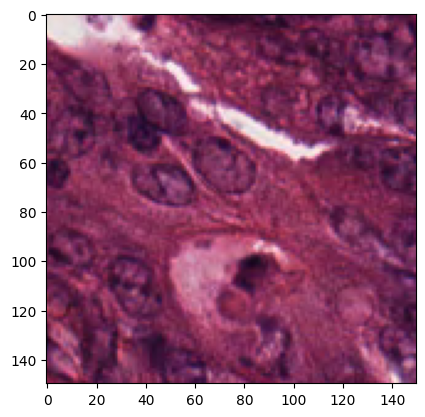

In [12]:
# plot sample image to check if import worked
import matplotlib.pyplot as plt

for image in images:
    plt.imshow(image)
    break

In [13]:
# create train / test spilt and save as np.array file
from sklearn.model_selection import train_test_split
import numpy as np
from numpy import savez_compressed

# Split the data and labels into training and testing sets
data_train, data_test, labels_train, labels_test = train_test_split(images, labels, test_size=0.2, random_state=42)

print("Data training set: \n", data_train.shape)
print("Labels training set: \n", labels_train.shape)
print("Data testing set: \n", data_test.shape)
print("Labels testing set: \n", labels_test.shape)

savez_compressed(join(data_folder, 'data_train.npz'), data_train)
savez_compressed(join(data_folder, 'labels_train.npz'), labels_train)
savez_compressed(join(data_folder, 'data_test.npz'), data_test)
savez_compressed(join(data_folder, 'labels_test.npz'), labels_test)


Data training set: 
 (4000, 150, 150, 3)
Labels training set: 
 (4000,)
Data testing set: 
 (1000, 150, 150, 3)
Labels testing set: 
 (1000,)


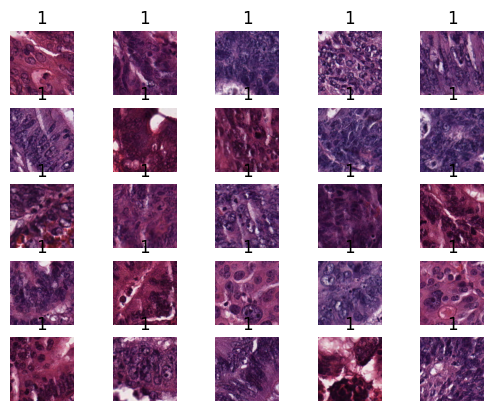

In [14]:
# define function to plot matrix of images and labels
def plot_imgs(img, label, n):
    for i in range(n * n):
        # define subplot
        plt.subplot(n, n, 1 + i)
        # turn off axis
        plt.axis('off')
        # set title to corresponding label
        plt.title(label[i])
        # plot raw pixel data
        plt.imshow(img[i])
    plt.show()


plot_imgs(images,labels, 5)

## Convert Large Images to np.arrray

In [15]:
# Convert Large Images to np.array
def load_large_images (path):
    images = list()
    for filename in listdir(path):
        print(filename)
        # load the image
        pixels = load_image(path + "/" + filename)
        # store
        images.append(pixels)
        print(len(images), pixels.shape)
    
    return asarray(images)

In [16]:
%%capture
# save large images as np.array
lare_img_path = join(data_folder, 'large_images')

large_imgs = load_large_images(lare_img_path)
savez_compressed(join(data_folder, 'large_imgs.npz'), large_imgs)

## Create Sub-Images

Here we create the dataset for the smaller images 50x50. We will increase the number of samples by 9.

In [17]:
# define function to slice images -> 150*150 = 9 * 50 * 50
def s_imgs_data(images):
    arr = images

    # Get 9 smaller images from each 150x150 image
    images_s = [arr[:, i:i+50, j:j+50, :] for i in range(0, 150, 50) for j in range(0, 150, 50)]

    # Stack the images to create a new array
    images_s = np.stack(images_s, axis=1)

    # Reshape the resulting array to (5000, 9, 50, 50, 3)
    images_s = images_s.reshape(5000, 9, 50, 50, 3)

    # Concatenate the arrays along the first axis
    images_s = np.concatenate(np.split(images_s, 5000), axis=1)

    # The final array will have shape (45000, 50, 50, 3)
    images_s = images_s[0]
    print("Image slicing completed! New array: ", images_s.shape)
    return images_s

In [18]:
small_images = s_imgs_data(images)

Image slicing completed! New array:  (45000, 50, 50, 3)


In [19]:
# define function to create new array with labels
def get_s_label(label):
    s_labels = list()
    for label in labels:
        for i in range(9):
            s_labels.append(label)
    print("New Labeling completed! New array:", len(s_labels))
    return asarray(s_labels)


In [20]:
# shape of old labels
labels.shape

(5000,)

In [21]:
# create new array
s_labels = get_s_label(labels)

New Labeling completed! New array: 45000


In [22]:
# check shape of new array
s_labels.shape

(45000,)

In [23]:
# save new arrays
savez_compressed(join(data_folder, 'all_sub_imgs.npz'), small_images)
savez_compressed(join(data_folder, 'all_sub_lables.npz'), s_labels)

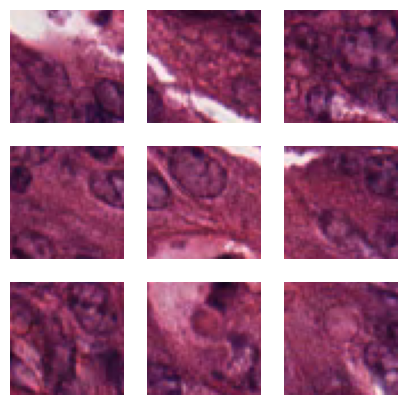

In [24]:
# define function to plot sub_imgs
def plot_s_imgs(img, n):
    plt.figure(figsize=(5,5))
    for i in range(n * n):
        # define subplot
        plt.subplot(n, n, 1 + i)
        # turn off axis
        plt.axis('off')
        # plot raw pixel data
        plt.imshow(img[i])
    plt.show()

# plot all subimages from one 150*150 -> select n = 3 (e.g. 9 subimages make up one 150*150 images)
plot_s_imgs(small_images, 3)

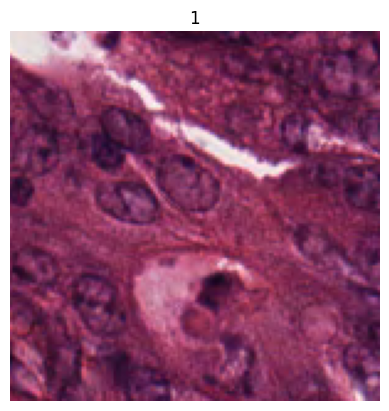

In [25]:
# plot the corresponding sub image to verify slicing
plot_imgs(images,labels, 1)

In [26]:
# print shape of new image and label arrays
print(small_images.shape)
s_labels.shape


(45000, 50, 50, 3)


(45000,)

### Train / Test Split for Subimages

In [27]:
# Split the data and labels into training and testing sets
data_train, data_test, labels_train, labels_test = train_test_split(small_images, s_labels, test_size=0.2, random_state=42)

print("Data training set: \n", data_train.shape)
print("Labels training set: \n", labels_train.shape)
print("Data testing set: \n", data_test.shape)
print("Labels testing set: \n", labels_test.shape)

# save newly created arrrays for sub images
savez_compressed(join(data_folder, 'sub_data_train.npz'), data_train)
savez_compressed(join(data_folder, 'sub_labels_train.npz'), labels_train)
savez_compressed(join(data_folder, 'sub_data_test.npz'), data_test)
savez_compressed(join(data_folder, 'sub_labels_test.npz'), labels_test)


Data training set: 
 (36000, 50, 50, 3)
Labels training set: 
 (36000,)
Data testing set: 
 (9000, 50, 50, 3)
Labels testing set: 
 (9000,)


In [28]:
from numpy import load
# load the prepared dataset -> test part of subimages to verify
data = load(join(data_folder, 'sub_data_test.npz'))
images = data['arr_0']
label_data = load(join(data_folder, 'sub_labels_test.npz'))
labels = label_data['arr_0']
print('Loaded: ', images.shape)
print('Loaded: ', labels.shape)

Loaded:  (9000, 50, 50, 3)
Loaded:  (9000,)


In [29]:
# print shape of one sub image
for i in images:
    print(i.shape)
    break

(50, 50, 3)


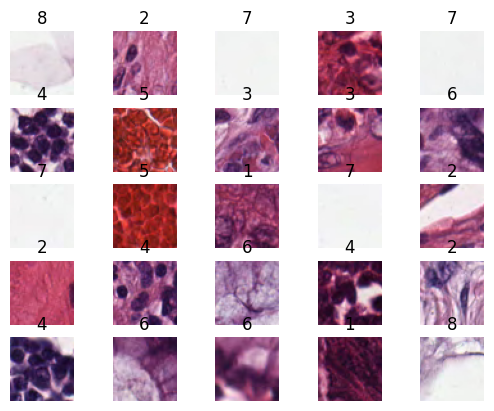

In [30]:
# plot the first 25 sub iamges (n = 5) -> shuffeled due to train / test split
plot_imgs(images,labels, 5)